In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.special import values
%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs

In [5]:
X,y = make_blobs(n_samples=1000,n_features=2,centers=3 )

In [6]:
X

array([[-0.86503332, -3.39464728],
       [ 5.95158982,  1.50274166],
       [ 6.87232097,  2.15612147],
       ...,
       [ 0.53660272, -2.46806149],
       [ 8.75991939, -7.10856758],
       [ 9.00877247, -5.39394254]])

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

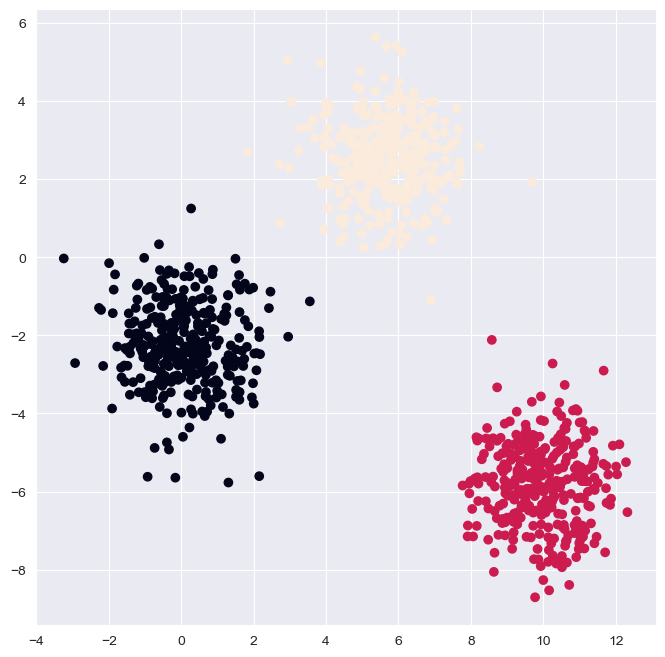

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(x=X[:,0],y=X[:,1], c=y)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
scaler = StandardScaler()

In [20]:
Wscc = []
for k in range(1,11):
    Kmean = KMeans(n_clusters=k)
    Kmean.fit(X_train)
    Wscc.append(Kmean.inertia_)

In [21]:
Wscc

[1599.999999999999,
 590.4576868371794,
 114.15633590948227,
 99.1471577197753,
 86.9744196629789,
 80.2828923081095,
 66.89658853760719,
 59.22276036046071,
 55.14115870662003,
 49.10073568308106]

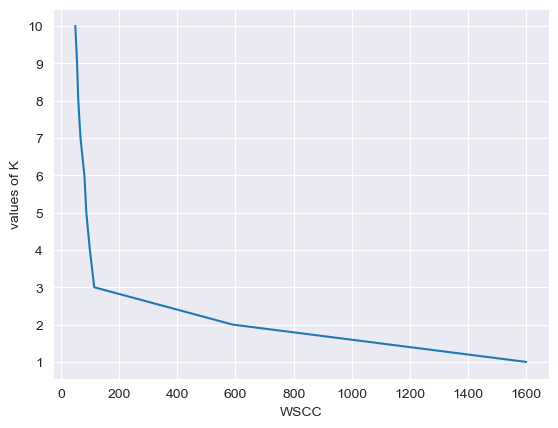

In [24]:
plt.plot(Wscc,range(1,11))
plt.yticks(range(1,11))
plt.ylabel("values of K")
plt.xlabel('WSCC')
plt.show()

In [35]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:

kmean = KMeans(n_clusters=3)

In [16]:
kmean.fit(X_train)

KMeans(n_clusters=3)

In [17]:
pred = kmean.predict(X_test)

In [18]:
pred

array([0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2,
       0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0, 2,
       0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0,
       2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 0,
       1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2,
       1, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       0, 1], dtype=int32)

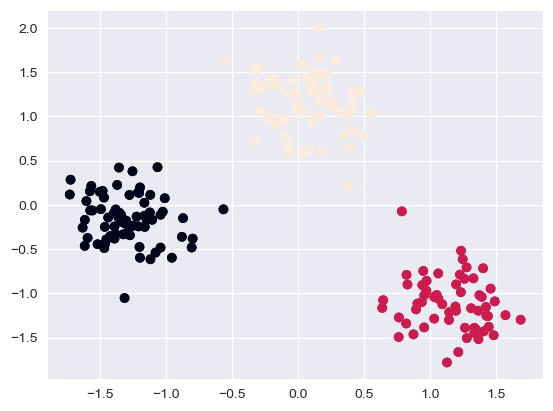

In [26]:
plt.scatter(X_test[:,0],X_test[:,1],c=pred)
plt.show()

In [27]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [28]:
!pip install kneed

In [29]:
from kneed import KneeLocator

In [30]:
knee = KneeLocator(range(1,11), Wscc,curve="convex",direction="decreasing")

In [31]:
knee.elbow

3

In [32]:
from sklearn.metrics import silhouette_score

In [42]:
silhouette_coe =[]
for k in range(2,11):
    kmean = KMeans(n_clusters=k,init="k-means++")
    kmean.fit(X_train)
    score = silhouette_score(X_train,kmean.labels_)
    silhouette_coe.append(score)

In [43]:
silhouette_coe

[0.6271765943130151,
 0.7703348007989687,
 0.6119796374468023,
 0.4595511168845624,
 0.4725498199549807,
 0.4859979269346396,
 0.33222220627468707,
 0.34174277946926757,
 0.3280571165453497]

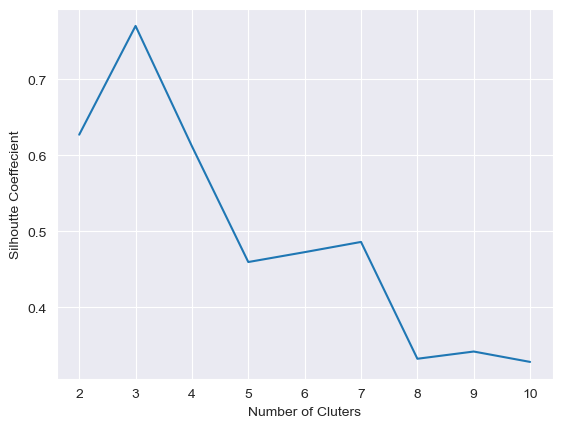

In [44]:

## plotting silhouette score
plt.plot(range(2,11),silhouette_coe)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()